# Assignment 2: PBL Characteristics and landcover

#### Load necessary packages

In [1]:
#load necessary packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes
import pandas as pd
from pathlib import Path
import scipy.stats
from datetime import datetime
import datetime
import sklearn.metrics

In [130]:
from utility import cal_vap_sat, cal_dens_dry, cal_dens_vap, cal_cpa, cal_dens_air, cal_Lob, cal_des_dta, cal_vpd, cal_gamma

In [3]:
%load_ext autoreload
%autoreload 2

### Load data (US-MOz)

In [4]:
group_number = 2
path_dir = Path.cwd() / 'data' / f'{group_number}'
# examine available files in your folder
list(path_dir.glob('*gz'))

# specify the site name
name_of_site = 'US-MOz'

# load dataset
site_file = name_of_site + '_clean.csv.gz'
path_data = path_dir / site_file
df_dataM = pd.read_csv(path_data, index_col='time', parse_dates=['time'])
#df_data.head()

#### LAI

In [5]:
def DOY_to_datetime(row):
    year=int(row['modis_date'][1:5])
    DOY=int(row['modis_date'][5:])
    return datetime.datetime(year, 1, 1) + datetime.timedelta(DOY - 1)

#US-MOz
df_LAIM=pd.read_csv('MODIS_LAI_AmeriFlux/statistics_Lai_500m-'+name_of_site+'.csv')
df_LAIM.columns=['product']+[i.split(' ')[1] for i in df_LAIM.columns if i!='product']
df_LAIM=df_LAIM.filter(['modis_date','value_mean'])

df_LAIM.set_index(df_LAIM.apply(DOY_to_datetime,axis=1),inplace=True)
df_LAIM.drop('modis_date',axis=1,inplace=True)
df_LAIM = df_LAIM.loc['2005 01 01':'2007 12 31']

LAIM_month = df_LAIM.groupby(df_LAIM.index.month).median()
#LAIM_mupper = df_LAIM.groupby(df_LAIM.index.month).quantile(0.75)
#LAIM_mlower = df_LAIM.groupby(df_LAIM.index.month).quantile(0.25)

### Load data (US-Bo1)

In [6]:
group_number = 6
path_dir = Path.cwd() / 'data' / f'{group_number}'
# examine available files in your folder
list(path_dir.glob('*gz'))

# specify the site name
name_of_site = 'US-Bo1'

# load dataset
site_file = name_of_site + '_clean.csv.gz'
path_data = path_dir / site_file
df_dataB = pd.read_csv(path_data, index_col='time', parse_dates=['time'])
#df_data.head()

#### LAI

In [7]:
def DOY_to_datetime(row):
    year=int(row['modis_date'][1:5])
    DOY=int(row['modis_date'][5:])
    return datetime.datetime(year, 1, 1) + datetime.timedelta(DOY - 1)

df_LAIB=pd.read_csv('MODIS_LAI_AmeriFlux/statistics_Lai_500m-'+name_of_site+'.csv')
df_LAIB.columns=['product']+[i.split(' ')[1] for i in df_LAIB.columns if i!='product']
df_LAIB=df_LAIB.filter(['modis_date','value_mean'])

df_LAIB.set_index(df_LAIB.apply(DOY_to_datetime,axis=1),inplace=True)
df_LAIB.drop('modis_date',axis=1,inplace=True)
df_LAIB = df_LAIB.loc['2005 01 01':'2007 12 31']

LAIB_month = df_LAIB.groupby(df_LAIB.index.month).median()
#LAIB_mupper = df_LAIB.groupby(df_LAIB.index.month).quantile(0.75)
#LAIB_mlower = df_LAIB.groupby(df_LAIB.index.month).quantile(0.25)

C:\Users\hanna\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


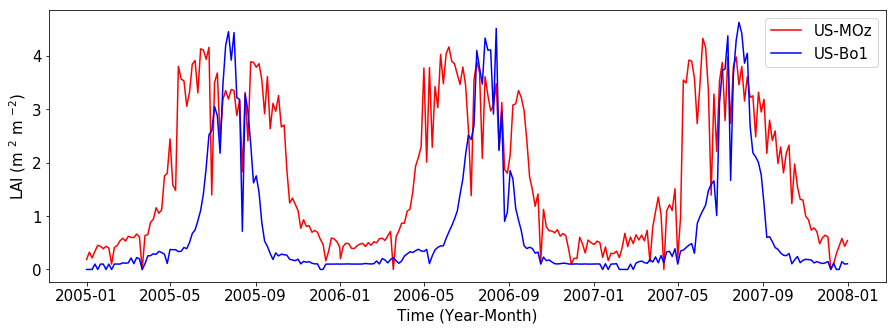

In [8]:
fontsize=15
plt.figure(figsize=(15,5))
plt.plot(df_LAIM, color='red', label='US-MOz')
plt.plot(df_LAIB, color='blue', label='US-Bo1')
plt.legend(loc='best', fontsize=fontsize)
plt.tick_params(labelsize=fontsize)
plt.ylabel('LAI (m $^{2}$ m $^{-2}$)', fontsize=fontsize)
plt.xlabel('Time (Year-Month)', fontsize=fontsize)
plt.savefig('LAI_series.png', dpi=200)

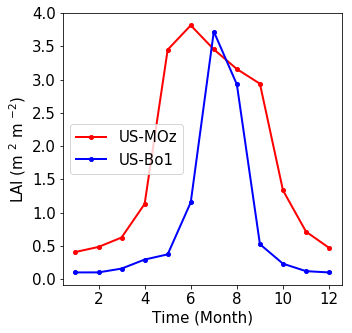

In [24]:
plt.figure(figsize=(5,5))
plt.plot(LAIM_month, color='red', marker='o', markersize=4, linewidth=2, label='US-MOz')
plt.plot(LAIB_month, color='blue', marker='o', markersize=4, linewidth=2, label='US-Bo1')
plt.legend(loc='best', fontsize=15)
plt.tick_params(labelsize=15)
plt.ylabel('LAI (m $^{2}$ m $^{-2}$)', fontsize=fontsize)
plt.xlabel('Time (Month)', fontsize=fontsize)
plt.xticks([2,4,6,8,10,12])
plt.savefig('LAI.png', dpi=200)

### Surface energy fluxes

#### Look at daytime fluxes only

In [10]:
#Full year
df_dataM1 = df_dataM.loc['2005 01 01':'2007 12 31']
df_dataB1 = df_dataB.loc['2005 01 01':'2007 12 31']

df_dataM1e = df_dataM1[df_dataM1['SWIN']>5]
df_dataB1e = df_dataB1[df_dataB1['SWIN']>5]

Mdata1 = df_dataM1e.loc[:,['NETRAD', 'H','LE']].dropna()
Bdata1 = df_dataB1e.loc[:,['NETRAD', 'H','LE']].dropna()

#Summer
M2005 = Mdata1.loc['2005 04 01':'2005 10 31']
M2006 = Mdata1.loc['2006 04 01':'2006 10 31']
M2007 = Mdata1.loc['2007 04 01':'2007 10 31']
Mdata1_sum = pd.concat([M2005, M2006, M2007], axis=0)

B2005 = Bdata1.loc['2005 04 01':'2005 10 31']
B2006 = Bdata1.loc['2006 04 01':'2006 10 31']
B2007 = Bdata1.loc['2007 04 01':'2007 10 31']
Bdata1_sum = pd.concat([B2005, B2006, B2007], axis=0)

In [11]:
#US-MOz
Qstar_M = Mdata1.NETRAD
Qh_M = Mdata1.H
Qe_M = Mdata1.LE
Qs_M = Qstar_M - Qh_M - Qe_M

Qstar_M_month = Qstar_M.groupby(Qstar_M.index.month).median()
Qh_M_month = Qh_M.groupby(Qh_M.index.month).median()
Qe_M_month = Qe_M.groupby(Qe_M.index.month).median()
Qs_M_month = Qs_M.groupby(Qs_M.index.month).median()

#US-Bo1
Qstar_B = Bdata1.NETRAD
Qh_B = Bdata1.H
Qe_B = Bdata1.LE
Qs_B = Qstar_B - Qh_B - Qe_B

Qstar_B_month = Qstar_B.groupby(Qstar_B.index.month).median()
Qh_B_month = Qh_B.groupby(Qh_B.index.month).median()
Qe_B_month = Qe_B.groupby(Qe_B.index.month).median()
Qs_B_month = Qs_B.groupby(Qs_B.index.month).median()

#Summer
Qstar_M_sum = Mdata1_sum.NETRAD
Qh_M_sum = Mdata1_sum.H
Qe_M_sum = Mdata1_sum.LE
Qs_M_sum = Qstar_M_sum - Qh_M_sum - Qe_M_sum

Qstar_B_sum = Bdata1_sum.NETRAD
Qh_B_sum = Bdata1_sum.H
Qe_B_sum = Bdata1_sum.LE
Qs_B_sum = Qstar_B_sum - Qh_B_sum - Qe_B_sum

In [172]:
#Full year
Qstar_M1 = Qstar_M[(Qstar_M.index).isin(Qstar_B.index)]
Qstar_B1 = Qstar_B[(Qstar_B.index).isin(Qstar_M.index)]

Qs_M1 = Qs_M[(Qs_M.index).isin(Qs_B.index)]
Qs_B1 = Qs_B[(Qs_B.index).isin(Qs_M.index)]

Qe_M1 = Qe_M[(Qe_M.index).isin(Qe_B.index)]
Qe_B1 = Qe_B[(Qe_B.index).isin(Qe_M.index)]

Qh_M1 = Qh_M[(Qh_M.index).isin(Qh_B.index)]
Qh_B1 = Qh_B[(Qh_B.index).isin(Qh_M.index)]

#Summer
Qstar_M1_sum = Qstar_M_sum[(Qstar_M_sum.index).isin(Qstar_B_sum.index)]
Qstar_B1_sum = Qstar_B_sum[(Qstar_B_sum.index).isin(Qstar_M_sum.index)]

Qs_M1_sum = Qs_M_sum[(Qs_M_sum.index).isin(Qs_B_sum.index)]
Qs_B1_sum = Qs_B_sum[(Qs_B_sum.index).isin(Qs_M_sum.index)]

Qe_M1_sum = Qe_M_sum[(Qe_M_sum.index).isin(Qe_B_sum.index)]
Qe_B1_sum = Qe_B_sum[(Qe_B_sum.index).isin(Qe_M_sum.index)]

Qh_M1_sum = Qh_M_sum[(Qh_M_sum.index).isin(Qh_B_sum.index)]
Qh_B1_sum = Qh_B_sum[(Qh_B_sum.index).isin(Qh_M_sum.index)]

In [171]:
#Mean bias error
def diff(obs, mod):
    diff = (mod-obs)
    return diff

In [173]:
Qstar_diffs = diff(Qstar_B1, Qstar_M1)
Qstar_mbd = Qstar_diffs.groupby(Qstar_diffs.index.month).mean() 

Qs_diffs = diff(Qs_B1, Qs_M1)
Qs_mbd = Qs_diffs.groupby(Qs_diffs.index.month).mean() 

Qe_diffs = diff(Qe_B1, Qe_M1)
Qe_mbd = Qe_diffs.groupby(Qe_diffs.index.month).mean() 

Qh_diffs = diff(Qh_B1, Qh_M1)
Qh_mbd = Qh_diffs.groupby(Qh_diffs.index.month).mean() 

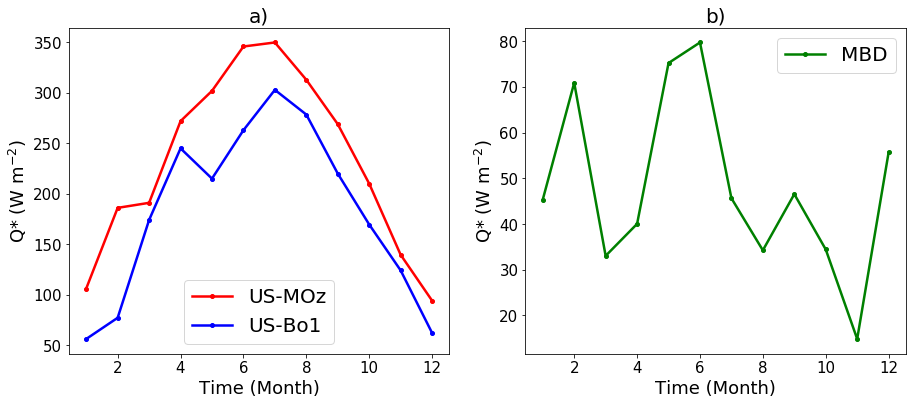

In [181]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

ax[0].plot(Qstar_M_month,color='red', marker='o', markersize=4, label = 'US-MOz', linewidth=2.5)
ax[0].plot(Qstar_B_month, color='blue', marker='o', markersize=4, label = 'US-Bo1', linewidth=2.5)
ax[0].legend(loc='best', fontsize=20)
ax[0].tick_params(labelsize=15)
ax[0].set_xlabel('Time (Month)', fontsize=18)
ax[0].set_ylabel('Q* (W m$^{-2}$)', fontsize=18)
ax[0].set_title('a)', fontsize=20)

ax[1].plot(Qstar_mbd, color='green', marker='o', markersize=4, label='MBD', linewidth=2.5)
ax[1].legend(loc='best', fontsize=20)
ax[1].tick_params(labelsize=15)
ax[1].set_xlabel('Time (Month)', fontsize=18)
ax[1].set_ylabel('Q* (W m$^{-2}$)', fontsize=18)
ax[1].set_title('b)', fontsize=20)

plt.savefig('Qstar.png', dpi=200)

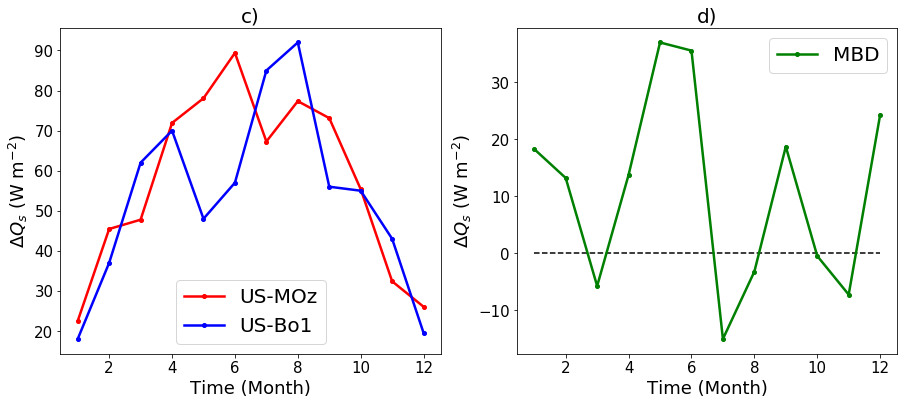

In [184]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

ax[0].plot(Qs_M_month,color='red', marker='o', markersize=4, label = 'US-MOz', linewidth=2.5)
ax[0].plot(Qs_B_month, color='blue', marker='o', markersize=4, label = 'US-Bo1', linewidth=2.5)
ax[0].legend(loc='best', fontsize=20)
ax[0].tick_params(labelsize=15)
ax[0].set_xlabel('Time (Month)', fontsize=18)
ax[0].set_ylabel('$\Delta Q_{s}$ (W m$^{-2}$)', fontsize=18)
ax[0].set_title('c)', fontsize=20)

ax[1].plot(Qs_mbd, color='green', marker='o', markersize=4, label='MBD', linewidth=2.5)
ax[1].hlines(0,1,12,linestyle='--')
ax[1].legend(loc='best', fontsize=20)
ax[1].tick_params(labelsize=15)
ax[1].set_xlabel('Time (Month)', fontsize=18)
ax[1].set_ylabel('$\Delta Q_{s}$ (W m$^{-2}$)', fontsize=18)
ax[1].set_title('d)', fontsize=20)

plt.savefig('Qs.png', dpi=200)

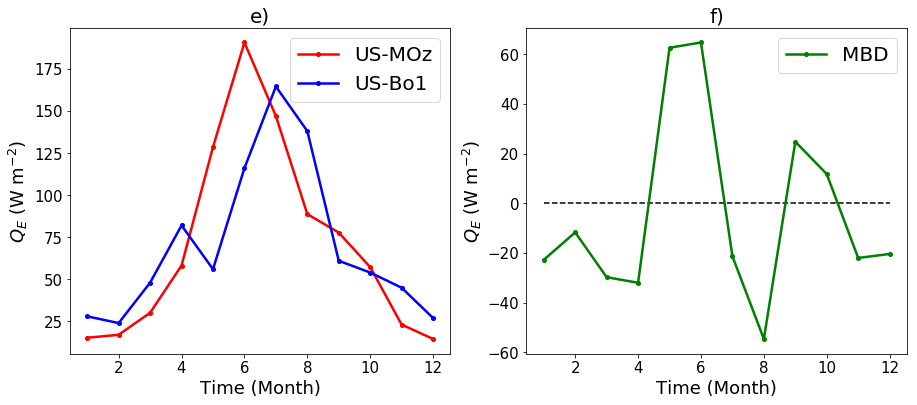

In [185]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

ax[0].plot(Qe_M_month,color='red', marker='o', markersize=4, label = 'US-MOz', linewidth=2.5)
ax[0].plot(Qe_B_month, color='blue', marker='o', markersize=4, label = 'US-Bo1', linewidth=2.5)
ax[0].legend(loc='best', fontsize=20)
ax[0].tick_params(labelsize=15)
ax[0].set_xlabel('Time (Month)', fontsize=18)
ax[0].set_ylabel('$Q_{E}$ (W m$^{-2}$)', fontsize=18)
ax[0].set_title('e)', fontsize=20)

ax[1].plot(Qe_mbd, color='green', marker='o', markersize=4, label='MBD', linewidth=2.5)
ax[1].hlines(0,1,12,linestyle='--')
ax[1].legend(loc='best', fontsize=20)
ax[1].tick_params(labelsize=15)
ax[1].set_xlabel('Time (Month)', fontsize=18)
ax[1].set_ylabel('$Q_{E}$ (W m$^{-2}$)', fontsize=18)
ax[1].set_title('f)', fontsize=20)

plt.savefig('Qe.png', dpi=200)

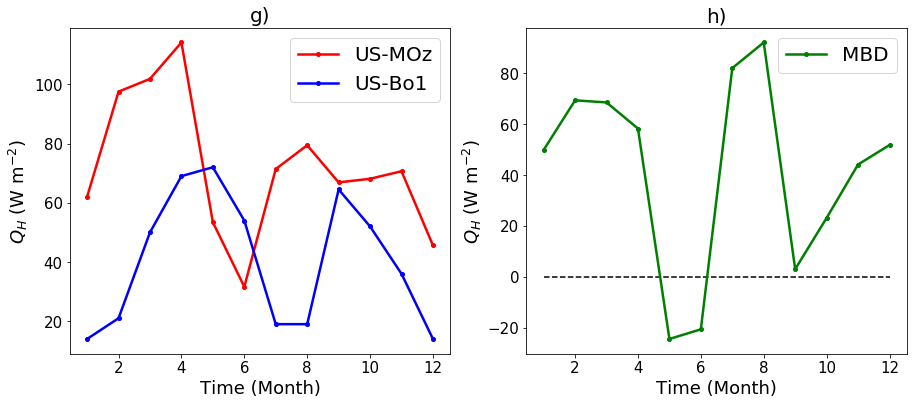

In [186]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

ax[0].plot(Qh_M_month,color='red', marker='o', markersize=4, label = 'US-MOz', linewidth=2.5)
ax[0].plot(Qh_B_month, color='blue', marker='o', markersize=4, label = 'US-Bo1', linewidth=2.5)
ax[0].legend(loc='best', fontsize=20)
ax[0].tick_params(labelsize=15)
ax[0].set_xlabel('Time (Month)', fontsize=18)
ax[0].set_ylabel('$Q_{H}$ (W m$^{-2}$)', fontsize=18)
ax[0].set_title('g)', fontsize=20)

ax[1].plot(Qh_mbd, color='green', marker='o', markersize=4, label='MBD', linewidth=2.5)
ax[1].hlines(0,1,12,linestyle='--')
ax[1].legend(loc='best', fontsize=20)
ax[1].tick_params(labelsize=15)
ax[1].set_xlabel('Time (Month)', fontsize=18)
ax[1].set_ylabel('$Q_{H}$ (W m$^{-2}$)', fontsize=18)
ax[1].set_title('h)', fontsize=20)

plt.savefig('Qh.png', dpi=200)

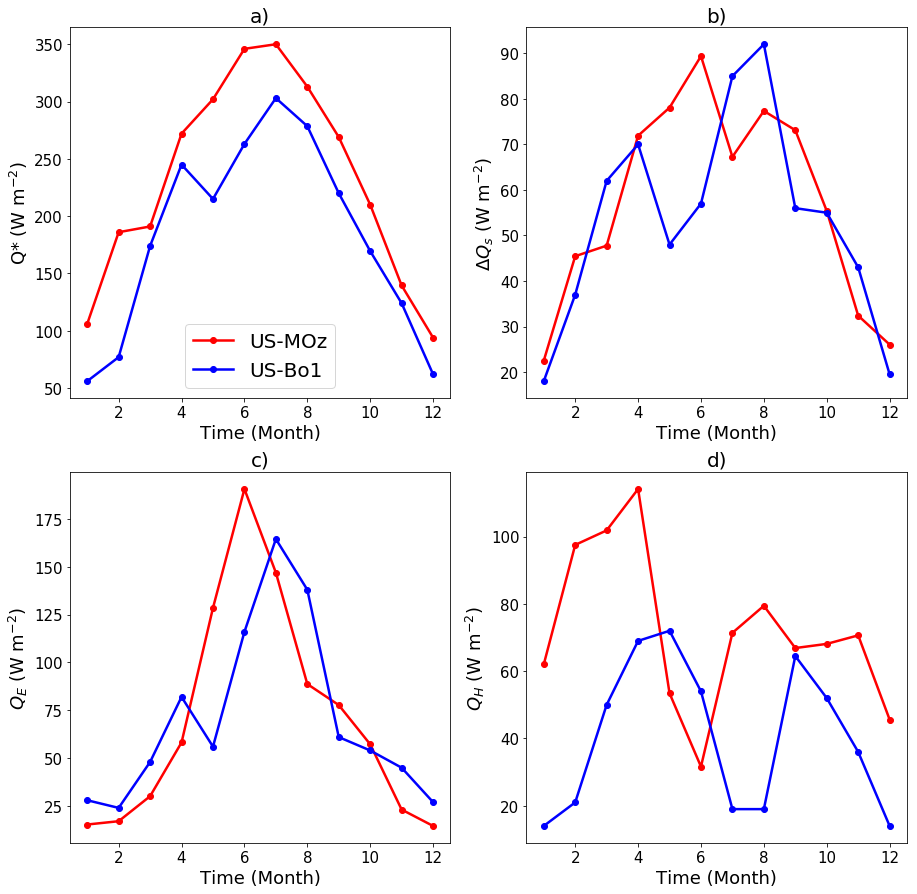

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))

ax[0,0].plot(Qstar_M_month,color='red', marker='o', markersize=6, label = 'US-MOz', linewidth=2.5)
ax[0,0].plot(Qstar_B_month, color='blue', marker='o', markersize=6, label = 'US-Bo1', linewidth=2.5)
ax[0,0].legend(loc='best', fontsize=20)
ax[0,0].tick_params(labelsize=15)
ax[0,0].set_xlabel('Time (Month)', fontsize=18)
ax[0,0].set_ylabel('Q* (W m$^{-2}$)', fontsize=18)
ax[0,0].set_title('a)', fontsize=20)

ax[0,1].plot(Qs_M_month,color='red', marker='o', markersize=6, label = 'US-MOz', linewidth=2.5)
ax[0,1].plot(Qs_B_month, color='blue', marker='o', markersize=6, label = 'US-Bo1', linewidth=2.5)
#ax[0,1].legend(loc='best', fontsize=20)
ax[0,1].tick_params(labelsize=15)
ax[0,1].set_xlabel('Time (Month)', fontsize=18)
ax[0,1].set_ylabel('$\Delta Q_{s}$ (W m$^{-2}$)', fontsize=18)
ax[0,1].set_title('b)', fontsize=20)

ax[1,0].plot(Qe_M_month,color='red', marker='o', markersize=6, label = 'US-MOz', linewidth=2.5)
ax[1,0].plot(Qe_B_month, color='blue', marker='o', markersize=6, label = 'US-Bo1', linewidth=2.5)
#ax[1,0].legend(loc='best', fontsize=20)
ax[1,0].tick_params(labelsize=15)
ax[1,0].set_xlabel('Time (Month)', fontsize=18)
ax[1,0].set_ylabel('$Q_{E}$ (W m$^{-2}$)', fontsize=18)
ax[1,0].set_title('c)', fontsize=20)

ax[1,1].plot(Qh_M_month,color='red', marker='o', markersize=6, label = 'US-MOz', linewidth=2.5)
ax[1,1].plot(Qh_B_month, color='blue', marker='o', markersize=6, label = 'US-Bo1', linewidth=2.5)
#ax[1,1].legend(loc='best', fontsize=20)
ax[1,1].tick_params(labelsize=15)
ax[1,1].set_xlabel('Time (Month)', fontsize=18)
ax[1,1].set_ylabel('$Q_{H}$ (W m$^{-2}$)', fontsize=18)
ax[1,1].set_title('d)', fontsize=20)

plt.savefig('SEB_comparison.png', dpi=200)

In [193]:
#Qstar
print (np.nanmean(Qstar_M))
print (np.nanmedian(Qstar_M))
print (np.percentile(Qstar_M, 75) - np.percentile(Qstar_M, 25))
print ('')
print (np.nanmean(Qstar_M_sum))
print (np.nanmedian(Qstar_M_sum))
print (np.percentile(Qstar_M_sum, 75) - np.percentile(Qstar_M_sum, 25))
print ('')
#Qs full year
print (np.nanmean(Qs_M))
print (np.nanmedian(Qs_M))
print (np.percentile(Qs_M, 75) - np.percentile(Qs_M, 25))
print ('')
print (np.nanmean(Qs_M_sum))
print (np.nanmedian(Qs_M_sum))
print (np.percentile(Qs_M_sum, 75) - np.percentile(Qs_M_sum, 25))
print ('')
#Qe full year
print (np.nanmean(Qe_M))
print (np.nanmedian(Qe_M))
print (np.percentile(Qe_M, 75) - np.percentile(Qe_M, 25))
print ('')
print (np.nanmean(Qe_M_sum))
print (np.nanmedian(Qe_M_sum))
print (np.percentile(Qe_M_sum, 75) - np.percentile(Qe_M_sum, 25))
print ('')
#Qh full year
print (np.nanmean(Qh_M))
print (np.nanmedian(Qh_M))
print (np.percentile(Qh_M, 75) - np.percentile(Qh_M, 25))
print ('')
print (np.nanmean(Qh_M_sum))
print (np.nanmedian(Qh_M_sum))
print (np.percentile(Qh_M_sum, 75) - np.percentile(Qh_M_sum, 25))

270.2729464204494
230.5
400.0

314.13826039832
295.0
452.0

76.44932238697352
59.339
140.9875

88.72652472564694
74.173
151.85375000000002

92.12184312744473
51.8905
113.76074999999997

125.00123824685
95.594
144.37875

101.7017809060311
67.532
170.0855

100.41049742582307
64.24600000000001
171.41275000000005


In [194]:
#Qstar
print (np.nanmean(Qstar_B))
print (np.nanmedian(Qstar_B))
print (np.percentile(Qstar_B, 75) - np.percentile(Qstar_B, 25))
print ('')
print (np.nanmean(Qstar_B_sum))
print (np.nanmedian(Qstar_B_sum))
print (np.percentile(Qstar_B_sum, 75) - np.percentile(Qstar_B_sum, 25))
print ('')
#Qs full year
print (np.nanmean(Qs_B))
print (np.nanmedian(Qs_B))
print (np.percentile(Qs_B, 75) - np.percentile(Qs_B, 25))
print ('')
print (np.nanmean(Qs_B_sum))
print (np.nanmedian(Qs_B_sum))
print (np.percentile(Qs_B_sum, 75) - np.percentile(Qs_B_sum, 25))
print ('')
#Qe full year
print (np.nanmean(Qe_B))
print (np.nanmedian(Qe_B))
print (np.percentile(Qe_B, 75) - np.percentile(Qe_B, 25))
print ('')
print (np.nanmean(Qe_B_sum))
print (np.nanmedian(Qe_B_sum))
print (np.percentile(Qe_B_sum, 75) - np.percentile(Qe_B_sum, 25))
print ('')
#Qh full year
print (np.nanmean(Qh_B))
print (np.nanmedian(Qh_B))
print (np.percentile(Qh_B, 75) - np.percentile(Qh_B, 25))
print ('')
print (np.nanmean(Qh_B_sum))
print (np.nanmedian(Qh_B_sum))
print (np.percentile(Qh_B_sum, 75) - np.percentile(Qh_B_sum, 25))

224.58708347646856
180.0
327.0

263.93694151834364
241.0
363.0

68.42665750601168
55.0
117.0

78.11391209589539
66.0
122.0

93.1637630662021
60.0
105.0

116.08369051943335
81.0
137.0

62.9966629042548
36.0
102.0

69.7393389030149
42.0
113.0


In [18]:
print (scipy.stats.ttest_ind(Qstar_M1, Qstar_B1, equal_var=False))
print (scipy.stats.ttest_ind(Qs_M1, Qs_B1, equal_var=False))
print (scipy.stats.ttest_ind(Qe_M1, Qe_B1, equal_var=False))
print (scipy.stats.ttest_ind(Qh_M1, Qh_B1, equal_var=False))
print ('')
print (scipy.stats.ttest_ind(Qstar_M1_sum, Qstar_B1_sum, equal_var=False))
print (scipy.stats.ttest_ind(Qs_M1_sum, Qs_B1_sum, equal_var=False))
print (scipy.stats.ttest_ind(Qe_M1_sum, Qe_B1_sum, equal_var=False))
print (scipy.stats.ttest_ind(Qh_M1_sum, Qh_B1_sum, equal_var=False))

Ttest_indResult(statistic=20.858094641159777, pvalue=5.226618321487471e-96)
Ttest_indResult(statistic=9.662012705823907, pvalue=4.664749471204776e-22)
Ttest_indResult(statistic=-0.8160037179440833, pvalue=0.41450360768960604)
Ttest_indResult(statistic=36.8125915320766, pvalue=1.8016314107203946e-290)

Ttest_indResult(statistic=17.515649140450844, pvalue=3.012330063084194e-68)
Ttest_indResult(statistic=9.274369744063918, pvalue=1.9362843533685723e-20)
Ttest_indResult(statistic=6.045776169139287, pvalue=1.508938599059305e-09)
Ttest_indResult(statistic=23.586385495657822, pvalue=1.7541603933204967e-121)


### Albedo

$$
{\alpha}=\frac{SW_{out}}{SW_{in}} 
$$

where $SW_{out}$ is the outgoing shortwave radiation (W m$^{-2}$), and $SW_{in}$ is the incoming shortwave radiation (W m$^{-2}$).

In [19]:
df_dataM2 = df_dataM.loc['2005 01 01':'2007 12 31']
df_dataB2 = df_dataB.loc['2005 01 01':'2007 12 31']

df_dataM2e = df_dataM2[df_dataM1['SWIN']>5]
df_dataB2e = df_dataB2[df_dataB1['SWIN']>5]

Mdata2 = df_dataM2e.loc[:,['SWIN', 'SWOUT']].dropna()
Bdata2 = df_dataB2e.loc[:,['SWIN', 'SWOUT']].dropna()

#Summer
M2005a = Mdata2.loc['2005 04 01':'2005 10 31']
M2006a = Mdata2.loc['2006 04 01':'2006 10 31']
M2007a = Mdata2.loc['2007 04 01':'2007 10 31']
Mdata2_sum = pd.concat([M2005a, M2006a, M2007a], axis=0)

B2005a = Bdata2.loc['2005 04 01':'2005 10 31']
B2006a = Bdata2.loc['2006 04 01':'2006 10 31']
B2007a = Bdata2.loc['2007 04 01':'2007 10 31']
Bdata2_sum = pd.concat([B2005a, B2006a, B2007a], axis=0)

In [20]:
# Albedo
alb_M = Mdata2.SWOUT/Mdata2.SWIN
alb_B = Bdata2.SWOUT/Bdata2.SWIN

alb_M_month = alb_M.groupby(alb_M.index.month).median()
alb_B_month = alb_B.groupby(alb_B.index.month).median()

#Summer
alb_M_sum = Mdata2_sum.SWOUT/Mdata2_sum.SWIN
alb_B_sum = Bdata2_sum.SWOUT/Bdata2_sum.SWIN

In [195]:
alb_M1 = alb_M[(alb_M.index).isin(alb_B.index)]
alb_B1 = alb_B[(alb_B.index).isin(alb_M.index)]

alb_M1_sum = alb_M_sum[(alb_M_sum.index).isin(alb_B_sum.index)]
alb_B1_sum = alb_B_sum[(alb_B_sum.index).isin(alb_M_sum.index)]

In [201]:
alb_diffs = diff(alb_B1, alb_M1)
alb_mbd = alb_diffs.groupby(alb_diffs.index.month).mean() 

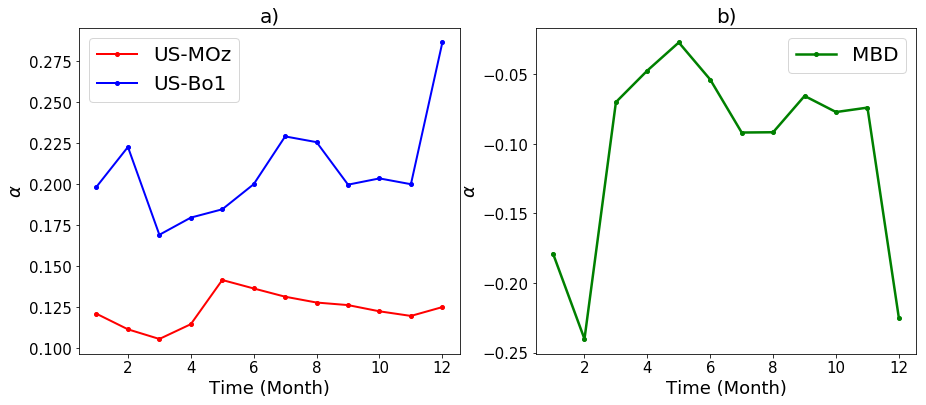

In [216]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

ax[0].plot(alb_M_month, color='red', marker='o', markersize=4, label='US-MOz', linewidth=2)
ax[0].plot(alb_B_month, color='blue', marker='o', markersize=4, label='US-Bo1', linewidth=2)
ax[0].legend(loc='best', fontsize=20)
ax[0].tick_params(labelsize=15)
ax[0].set_xlabel('Time (Month)', fontsize=18)
ax[0].set_ylabel(r'$\alpha$', fontsize=18)
ax[0].set_title('a)', fontsize=20)

ax[1].plot(alb_mbd, color='green', marker='o', markersize=4, label='MBD', linewidth=2.5)
#ax[1].hlines(0,1,12,linestyle='--')
ax[1].legend(loc='best', fontsize=20)
ax[1].tick_params(labelsize=15)
ax[1].set_xlabel('Time (Month)', fontsize=18)
ax[1].set_ylabel(r'$\alpha$', fontsize=18)
ax[1].set_title('b)', fontsize=20)

plt.savefig('alb.png', dpi=200)

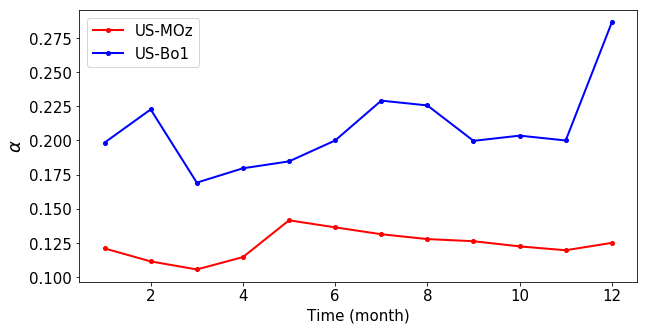

In [21]:
plt.figure(figsize=(10,5))
plt.plot(alb_M_month, color='red', marker='o', markersize=4, label='US-MOz', linewidth=2)
plt.plot(alb_B_month, color='blue', marker='o', markersize=4, label='US-Bo1', linewidth=2)
plt.legend(loc='best', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlabel('Time (month)', fontsize=15)
plt.ylabel(r'$\alpha$', fontsize=18)
plt.savefig('Albedo.png', dpi=200)

In [203]:
print (np.nanmean(alb_M))
print (np.nanmedian(alb_M))
print (np.percentile(alb_M, 75) - np.percentile(alb_M, 25))
print ('')
print (np.nanmean(alb_M_sum))
print (np.nanmedian(alb_M_sum))
print (np.percentile(alb_M_sum, 75) - np.percentile(alb_M_sum, 25))
print ('')

print (np.nanmean(alb_B))
print (np.nanmedian(alb_B))
print (np.percentile(alb_B, 75) - np.percentile(alb_B, 25))
print ('')
print (np.nanmean(alb_B_sum))
print (np.nanmedian(alb_B_sum))
print (np.percentile(alb_B_sum, 75) - np.percentile(alb_B_sum, 25))
print ('')

0.1517510881421422
0.12536443148688048
0.040918015620227774

0.15654721342973074
0.12951619679214993
0.038889892056430064

0.24462939035964776
0.2006125574272588
0.07608695652173914

0.22237114765856414
0.20306513409961685
0.06086334616460348



In [22]:
print (scipy.stats.ttest_ind(alb_M1, alb_B1, equal_var=False))
print (scipy.stats.ttest_ind(alb_M1_sum, alb_B1_sum, equal_var=False))

(0.3327223578565457, 0.0)
(0.6302337775896127, 0.0)


In [204]:
# z0
#Full year
df_dataM3 = df_dataM.loc['2005 01 01':'2007 12 31']
df_dataB3 = df_dataB.loc['2005 01 01':'2007 12 31']

df_dataM3e = df_dataM3[df_dataM3['SWIN']>5]
df_dataB3e = df_dataB3[df_dataB3['SWIN']>5]

Mdata3 = df_dataM3e.loc[:,['WS','USTAR','H','LE','TA','PA','RH']].dropna()
Bdata3 = df_dataB3e.loc[:,['WS','USTAR','H','LE','TA','PA','RH']].dropna()

Mdata3e = Mdata3[(Mdata3.WS!=0) & (Mdata3.LE!=0)]
Bdata3e = Bdata3[(Bdata3.WS!=0) & (Bdata3.LE!=0)]

#Summer
M2005b = Mdata3e.loc['2005 04 01':'2005 10 31']
M2006b = Mdata3e.loc['2006 04 01':'2006 10 31']
M2007b = Mdata3e.loc['2007 04 01':'2007 10 31']
Mdata3_sum = pd.concat([M2005b, M2006b, M2007b], axis=0)

B2005b = Bdata3e.loc['2005 04 01':'2005 10 31']
B2006b = Bdata3e.loc['2006 04 01':'2006 10 31']
B2007b = Bdata3e.loc['2007 04 01':'2007 10 31']
Bdata3_sum = pd.concat([B2005b, B2006b, B2007b], axis=0)

In [207]:
#US-MOz
z_meas_M = 30
h_sfc_M = 22
d_M = 0.7*h_sfc_M

Uz_M = Mdata3e.WS
Ustar_M = Mdata3e.USTAR

#US-Bo1
z_meas_B = 10
h_sfc_B_win = 0
h_sfc_B_corn = 3
h_sfc_B_soya = 0.9
d_B = Bdata3e.USTAR.copy()

d_B.loc['2005 01 01':'2005 05 31'] = (0.7 * h_sfc_B_win) 
d_B.loc['2005 06 01':'2005 09 30'] = (0.7 * h_sfc_B_corn)
d_B.loc['2005 10 01':'2006 05 31'] = (0.7 * h_sfc_B_win)
d_B.loc['2006 06 01':'2006 09 30'] = (0.7 * h_sfc_B_soya)
d_B.loc['2006 10 01':'2007 05 31'] = (0.7 * h_sfc_B_win)
d_B.loc['2007 06 01':'2007 09 30'] = (0.7 * h_sfc_B_corn)
d_B.loc['2007 10 01':'2007 12 31'] = (0.7 * h_sfc_B_win)

Uz_B = Bdata3e.WS
Ustar_B = Bdata3e.USTAR

#Summer
Uz_M_sum = Mdata3_sum.WS
Ustar_M_sum = Mdata3_sum.USTAR

Uz_B_sum = Bdata3_sum.WS
Ustar_B_sum = Bdata3_sum.USTAR

d_B_sum = Bdata3_sum.USTAR.copy()

d_B_sum.loc['2005 01 01':'2005 05 31'] = (0.7 * h_sfc_B_win) 
d_B_sum.loc['2005 06 01':'2005 09 30'] = (0.7 * h_sfc_B_corn)
d_B_sum.loc['2005 10 01':'2006 05 31'] = (0.7 * h_sfc_B_win)
d_B_sum.loc['2006 06 01':'2006 09 30'] = (0.7 * h_sfc_B_soya)
d_B_sum.loc['2006 10 01':'2007 05 31'] = (0.7 * h_sfc_B_win)
d_B_sum.loc['2007 06 01':'2007 09 30'] = (0.7 * h_sfc_B_corn)
d_B_sum.loc['2007 10 01':'2007 12 31'] = (0.7 * h_sfc_B_win)

In [210]:
z0_M = (z_meas_M - d_M)*np.exp(-(Uz_M*0.4)/Ustar_M)
z0_B = (z_meas_B - d_B)*np.exp(-(Uz_B*0.4)/Ustar_B)

z0_Mn = z0_M[z0_M!=0]
z0_Bn = z0_B[z0_B!=0]

z0_M_month = z0_Mn.groupby(z0_Mn.index.month).median()
z0_B_month = z0_Bn.groupby(z0_Bn.index.month).median()

#Summer
z0_M_sum = (z_meas_M - d_M)*np.exp(-(Uz_M_sum*0.4)/Ustar_M_sum)
z0_B_sum = (z_meas_B - d_B_sum)*np.exp(-(Uz_B_sum*0.4)/Ustar_B_sum)

z0_Mn_sum = z0_M_sum[z0_M_sum!=0]
z0_Bn_sum = z0_B_sum[z0_B_sum!=0]

In [211]:
z0_M1 = z0_Mn[(z0_Mn.index).isin(z0_Bn.index)]
z0_B1 = z0_Bn[(z0_Bn.index).isin(z0_Mn.index)]

z0_M1_sum = z0_Mn_sum[(z0_Mn_sum.index).isin(z0_Bn_sum.index)]
z0_B1_sum = z0_Bn_sum[(z0_Bn_sum.index).isin(z0_Mn_sum.index)]

In [212]:
z0_diffs = diff(z0_B1, z0_M1)
z0_mbd = z0_diffs.groupby(z0_diffs.index.month).mean() 

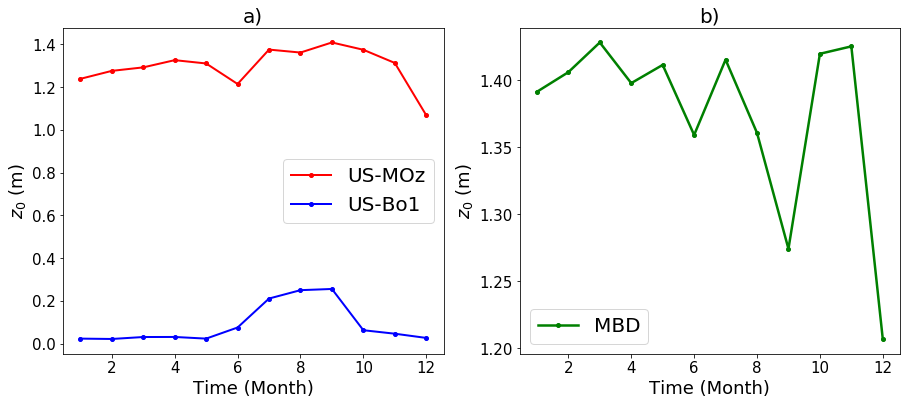

In [217]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

ax[0].plot(z0_M_month, color='red', marker='o', markersize=4, label='US-MOz', linewidth=2)
ax[0].plot(z0_B_month, color='blue', marker='o', markersize=4, label='US-Bo1', linewidth=2)
ax[0].legend(loc='best', fontsize=20)
ax[0].tick_params(labelsize=15)
ax[0].set_xlabel('Time (Month)', fontsize=18)
ax[0].set_ylabel(r'$z_{0}$ (m)', fontsize=18)
ax[0].set_title('a)', fontsize=20)

ax[1].plot(z0_mbd, color='green', marker='o', markersize=4, label='MBD', linewidth=2.5)
#ax[1].hlines(0,1,12,linestyle='--')
ax[1].legend(loc='best', fontsize=20)
ax[1].tick_params(labelsize=15)
ax[1].set_xlabel('Time (Month)', fontsize=18)
ax[1].set_ylabel(r'$z_{0}$ (m)', fontsize=18)
ax[1].set_title('b)', fontsize=20)

plt.savefig('z0.png', dpi=200)

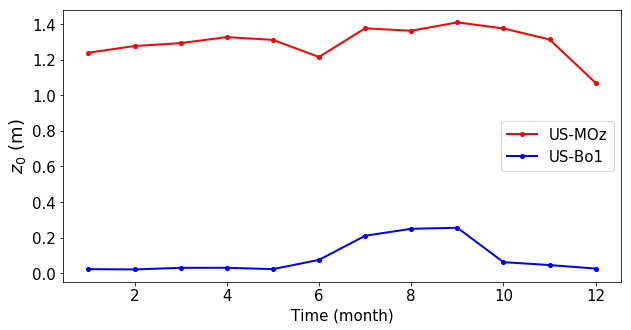

In [114]:
plt.figure(figsize=(10,5))
plt.plot(z0_M_month, color='red', marker='o', markersize=4, label='US-MOz', linewidth=2)
plt.plot(z0_B_month, color='blue', marker='o', markersize=4, label='US-Bo1', linewidth=2)
plt.legend(loc='best', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlabel('Time (month)', fontsize=15)
plt.ylabel(r'$z_{0}$ (m)', fontsize=18)
plt.savefig('z0.png', dpi=200)

In [218]:
print (np.nanmean(z0_Mn))
print (np.nanmedian(z0_Mn))
print (np.percentile(z0_Mn, 75) - np.percentile(z0_Mn, 25))
print ('')
print (np.nanmean(z0_Mn_sum))
print (np.nanmedian(z0_Mn_sum))
print (np.percentile(z0_Mn_sum, 75) - np.percentile(z0_Mn_sum, 25))
print ('')

print (np.nanmean(z0_Bn))
print (np.nanmedian(z0_Bn))
print (np.percentile(z0_Bn, 75) - np.percentile(z0_Bn, 25))
print ('')
print (np.nanmean(z0_Bn_sum))
print (np.nanmedian(z0_Bn_sum))
print (np.percentile(z0_Bn_sum, 75) - np.percentile(z0_Bn_sum, 25))
print ('')

1.4876118849715179
1.2998100129604688
1.2292256909208037

1.5306573046443428
1.3387184462674366
1.340584161652529

0.14987006453176868
0.059905448729489885
0.16577417494076285

0.19308137319680413
0.10130456414826433
0.22661789355759732



In [219]:
print (scipy.stats.ttest_ind(z0_M1, z0_B1, equal_var=False))
print (scipy.stats.ttest_ind(z0_M1_sum, z0_B1_sum, equal_var=False))

Ttest_indResult(statistic=144.0602977728556, pvalue=0.0)
Ttest_indResult(statistic=111.41665028944495, pvalue=0.0)


In [220]:
# Bowen ratio
df_dataM5 = df_dataM.loc['2005 01 01':'2007 12 31']
df_dataB5 = df_dataB.loc['2005 01 01':'2007 12 31']

df_dataM5e = df_dataM5[df_dataM5['SWIN']>5]
df_dataB5e = df_dataB5[df_dataB5['SWIN']>5]

Mdata5 = df_dataM5e.loc[:,['H', 'LE']].dropna()
Bdata5 = df_dataB5e.loc[:,['H', 'LE']].dropna()

Mdata5e = Mdata5[Mdata5.LE!=0]
Bdata5e = Bdata5[Bdata5.LE!=0]

#Summer
M2005d = Mdata5e.loc['2005 04 01':'2005 10 31']
M2006d = Mdata5e.loc['2006 04 01':'2006 10 31']
M2007d = Mdata5e.loc['2007 04 01':'2007 10 31']
Mdata5_sum = pd.concat([M2005d, M2006d, M2007d], axis=0)

B2005d = Bdata5e.loc['2005 04 01':'2005 10 31']
B2006d = Bdata5e.loc['2006 04 01':'2006 10 31']
B2007d = Bdata5e.loc['2007 04 01':'2007 10 31']
Bdata5_sum = pd.concat([B2005d, B2006d, B2007d], axis=0)

In [221]:
# 
bowen_M = Mdata5e.H/Mdata5e.LE
bowen_B = Bdata5e.H/Bdata5e.LE

bowen_M_month = bowen_M.groupby(bowen_M.index.month).median()
bowen_B_month = bowen_B.groupby(bowen_B.index.month).median()

#Summer
bowen_M_sum = Mdata5_sum.H/Mdata5_sum.LE
bowen_B_sum = Bdata5_sum.H/Bdata5_sum.LE

In [222]:
bowen_M1 = bowen_M[(bowen_M.index).isin(bowen_B.index)]
bowen_B1 = bowen_B[(bowen_B.index).isin(bowen_M.index)]

bowen_M1_sum = bowen_M_sum[(bowen_M_sum.index).isin(bowen_B_sum.index)]
bowen_B1_sum = bowen_B_sum[(bowen_B_sum.index).isin(bowen_M_sum.index)]

In [223]:
bowen_diffs = diff(bowen_B1, bowen_M1)
bowen_mbd = bowen_diffs.groupby(bowen_diffs.index.month).mean() 

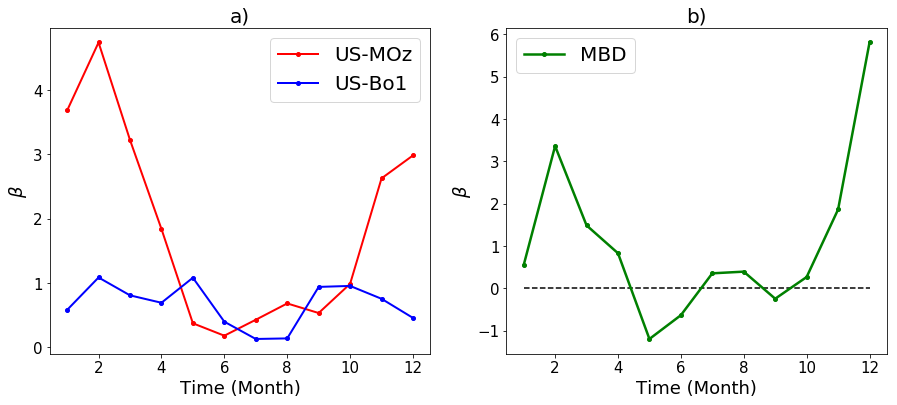

In [225]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

ax[0].plot(bowen_M_month, color='red', marker='o', markersize=4, label='US-MOz', linewidth=2)
ax[0].plot(bowen_B_month, color='blue', marker='o', markersize=4, label='US-Bo1', linewidth=2)
ax[0].legend(loc='best', fontsize=20)
ax[0].tick_params(labelsize=15)
ax[0].set_xlabel('Time (Month)', fontsize=18)
ax[0].set_ylabel(r'$\beta$', fontsize=18)
ax[0].set_title('a)', fontsize=20)

ax[1].plot(bowen_mbd, color='green', marker='o', markersize=4, label='MBD', linewidth=2.5)
ax[1].hlines(0,1,12,linestyle='--')
ax[1].legend(loc='best', fontsize=20)
ax[1].tick_params(labelsize=15)
ax[1].set_xlabel('Time (Month)', fontsize=18)
ax[1].set_ylabel(r'$\beta$', fontsize=18)
ax[1].set_title('b)', fontsize=20)

plt.savefig('bowen.png', dpi=200)

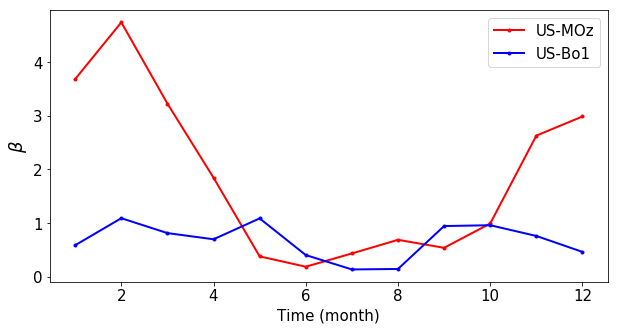

In [91]:
plt.figure(figsize=(10,5))
plt.plot(bowen_M_month, color='red', marker='o', markersize=3, label='US-MOz', linewidth=2)
plt.plot(bowen_B_month, color='blue', marker='o', markersize=3, label='US-Bo1', linewidth=2)
plt.legend(loc='best', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlabel('Time (month)', fontsize=15)
plt.ylabel(r'$\beta$', fontsize=18)
plt.savefig('Bowen.png', dpi=200)

In [226]:
print (np.nanmean(bowen_M))
print (np.nanmedian(bowen_M))
print (np.percentile(bowen_M, 75) - np.percentile(bowen_M, 25))
print ('')
print (np.nanmean(bowen_M_sum))
print (np.nanmedian(bowen_M_sum))
print (np.percentile(bowen_M_sum, 75) - np.percentile(bowen_M_sum, 25))
print ('')

print (np.nanmean(bowen_B))
print (np.nanmedian(bowen_B))
print (np.percentile(bowen_B, 75) - np.percentile(bowen_B, 25))
print ('')
print (np.nanmean(bowen_B_sum))
print (np.nanmedian(bowen_B_sum))
print (np.percentile(bowen_B_sum, 75) - np.percentile(bowen_B_sum, 25))
print ('')

1.6187177744875318
0.7497640915540582
2.8336354388440577

0.7863514671345359
0.4492206263855478
1.3171886612883323

0.8503850080078144
0.453125
1.3053221288515406

0.7836860918946108
0.35809035986340954
1.0953572790672332



In [227]:
print (scipy.stats.ttest_ind(bowen_M1, bowen_B1, equal_var=False))
print (scipy.stats.ttest_ind(bowen_M1_sum, bowen_B1_sum, equal_var=False))

Ttest_indResult(statistic=2.7751459848327027, pvalue=0.005523522339051837)
Ttest_indResult(statistic=-0.3917544529724405, pvalue=0.6952460120586017)


In [237]:
# a1
df_dataM6 = df_dataM.loc['2005 01 01':'2007 12 31']
df_dataB6 = df_dataB.loc['2005 01 01':'2007 12 31']

df_dataM6e = df_dataM6[df_dataM6['SWIN']>5]
df_dataB6e = df_dataB6[df_dataB6['SWIN']>5]

Mdata6 = df_dataM6e.loc[:,['NETRAD','H','LE']].dropna()
Bdata6 = df_dataB6e.loc[:,['NETRAD','H','LE']].dropna()

Mdata6e = Mdata6[Mdata6.NETRAD!=0]
Bdata6e = Bdata6[Bdata6.NETRAD!=0]

#Summer
M2005f = Mdata6e.loc['2005 04 01':'2005 10 31']
M2006f = Mdata6e.loc['2006 04 01':'2006 10 31']
M2007f = Mdata6e.loc['2007 04 01':'2007 10 31']
Mdata6_sum = pd.concat([M2005f, M2006f, M2007f], axis=0)

B2005f = Bdata6e.loc['2005 04 01':'2005 10 31']
B2006f = Bdata6e.loc['2006 04 01':'2006 10 31']
B2007f = Bdata6e.loc['2007 04 01':'2007 10 31']
Bdata6_sum = pd.concat([B2005f, B2006f, B2007f], axis=0)

In [238]:
#Full year
Qstar_Mu = Mdata6e.NETRAD
Qs_Mu = Qstar_Mu - Mdata6e.LE - Mdata6e.H

Qstar_Bu = Bdata6e.NETRAD
Qs_Bu = Qstar_Bu - Bdata6e.LE - Bdata6e.H

a1_M = Qs_Mu/Qstar_Mu
a1_B = Qs_Bu/Qstar_Bu

a1_M_month = a1_M.groupby(a1_M.index.month).median()
a1_B_month = a1_B.groupby(a1_B.index.month).median()

#Summer
Qstar_Mu_sum = Mdata6_sum.NETRAD
Qs_Mu_sum = Qstar_Mu_sum - Mdata6_sum.LE - Mdata6_sum.H

Qstar_Bu_sum = Bdata6_sum.NETRAD
Qs_Bu_sum = Qstar_Bu_sum - Bdata6_sum.LE - Bdata6_sum.H

a1_M_sum = Qs_Mu_sum/Qstar_Mu_sum
a1_B_sum = Qs_Bu_sum/Qstar_Bu_sum

In [239]:
a1_M1 = a1_M[(a1_M.index).isin(a1_B.index)]
a1_B1 = a1_B[(a1_B.index).isin(a1_M.index)]

a1_M1_sum = a1_M_sum[(a1_M_sum.index).isin(a1_B_sum.index)]
a1_B1_sum = a1_B_sum[(a1_B_sum.index).isin(a1_M_sum.index)]

In [244]:
a1_diffs = diff(a1_B1, a1_M1)
a1_mbd = a1_diffs.groupby(a1_diffs.index.month).mean() 

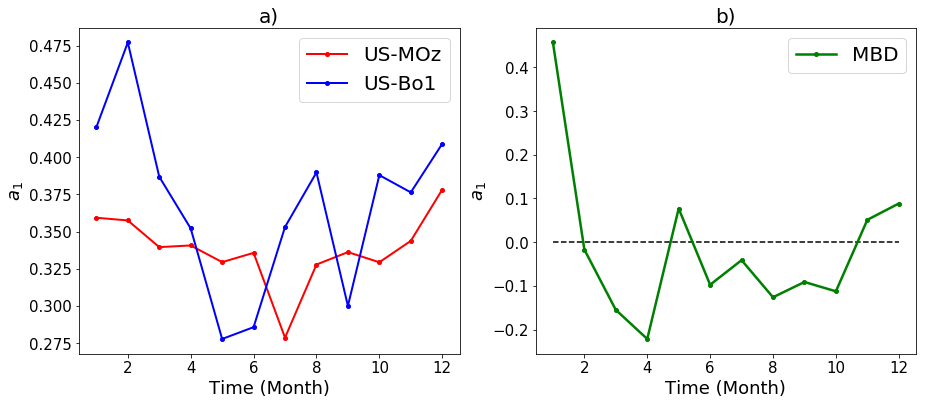

In [245]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

ax[0].plot(a1_M_month, color='red', marker='o', markersize=4, label='US-MOz', linewidth=2)
ax[0].plot(a1_B_month, color='blue', marker='o', markersize=4, label='US-Bo1', linewidth=2)
ax[0].legend(loc='best', fontsize=20)
ax[0].tick_params(labelsize=15)
ax[0].set_xlabel('Time (Month)', fontsize=18)
ax[0].set_ylabel(r'$a_{1}$', fontsize=18)
ax[0].set_title('a)', fontsize=20)

ax[1].plot(a1_mbd, color='green', marker='o', markersize=4, label='MBD', linewidth=2.5)
ax[1].hlines(0,1,12,linestyle='--')
ax[1].legend(loc='best', fontsize=20)
ax[1].tick_params(labelsize=15)
ax[1].set_xlabel('Time (Month)', fontsize=18)
ax[1].set_ylabel(r'$a_{1}$', fontsize=18)
ax[1].set_title('b)', fontsize=20)

plt.savefig('a1.png', dpi=200)

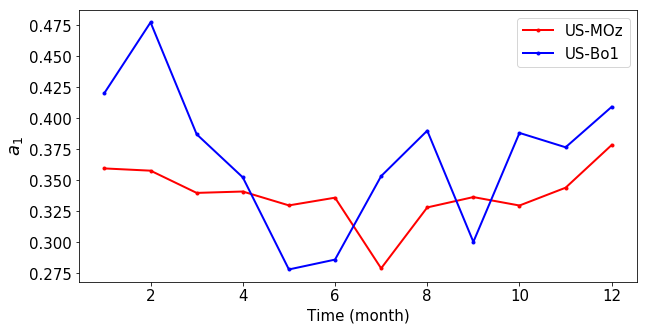

In [114]:
plt.figure(figsize=(10,5))
plt.plot(a1_M_month, color='red', marker='o', markersize=3, label='US-MOz', linewidth=2)
plt.plot(a1_B_month, color='blue', marker='o', markersize=3, label='US-Bo1', linewidth=2)
plt.legend(loc='best', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlabel('Time (month)', fontsize=15)
plt.ylabel(r'$a_{1}$', fontsize=18)
plt.savefig('a1.png', dpi=200)

In [246]:
print (np.nanmean(a1_M))
print (np.nanmedian(a1_M))
print (np.percentile(a1_M, 75) - np.percentile(a1_M, 25))
print ('')
print (np.nanmean(a1_M_sum))
print (np.nanmedian(a1_M_sum))
print (np.percentile(a1_M_sum, 75) - np.percentile(a1_M_sum, 25))
print ('')

print (np.nanmean(a1_B))
print (np.nanmedian(a1_B))
print (np.percentile(a1_B, 75) - np.percentile(a1_B, 25))
print ('')
print (np.nanmean(a1_B_sum))
print (np.nanmedian(a1_B_sum))
print (np.percentile(a1_B_sum, 75) - np.percentile(a1_B_sum, 25))
print ('')

0.3386215526922474
0.33287734241908007
0.3828616763565892

0.3247456834149695
0.32477486910994763
0.3372143053777915

0.3540885096420099
0.35465891472868216
0.4057483372945832

0.39451646364901205
0.3379891537591198
0.3395266135048418



In [247]:
print (scipy.stats.ttest_ind(a1_M1, a1_B1, equal_var=False))
print (scipy.stats.ttest_ind(a1_M1_sum, a1_B1_sum, equal_var=False))

Ttest_indResult(statistic=-0.8590186143909657, pvalue=0.3903377641526008)
Ttest_indResult(statistic=-1.3070726033151658, pvalue=0.19120745270797487)
